# First Name: Soe Htet
# Last Name:  Naung

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Import Data

In [2]:
Dengue = pd.read_csv('Dengue.csv', low_memory=False) #increase efficiency
Dengue.head()

,ID,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,sj,1990,18,30/04/1990,0.122600,0.103725,0.198483,0.177617,12.42,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,2,sj,1990,19,7/05/1990,0.169900,0.142175,0.162357,0.155486,22.82,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,3,sj,1990,20,14/05/1990,0.032250,0.172967,0.157200,0.170843,34.54,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,4,sj,1990,21,21/05/1990,0.128633,0.245067,0.227557,0.235886,15.36,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,5,sj,1990,22,28/05/1990,0.196200,0.262200,0.251200,0.247340,7.52,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# Data management 

In [12]:
Dengue['reanalysis_avg_temp_k'] = pd.to_numeric(Dengue['reanalysis_avg_temp_k'],errors='coerce') #convert variable to numeric

In [13]:
Dengue_clean=Dengue.dropna() #dropping null values


# Scatter plot between explantory variable and response variable (y=total_cases)

<IPython.core.display.Javascript object>


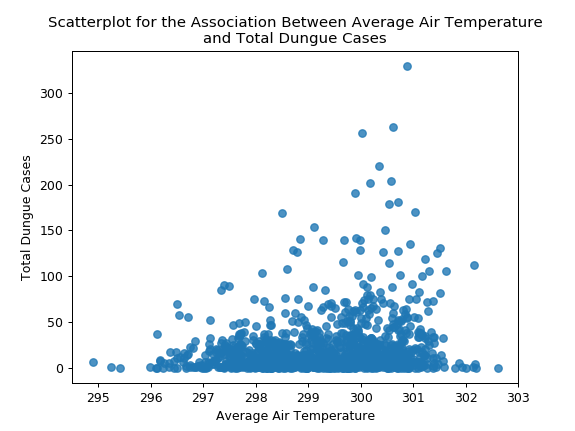

Text(0.5, 1.0, 'Scatterplot for the Association Between Average Air Temperature\nand Total Dungue Cases')

In [14]:
%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="reanalysis_avg_temp_k", y="total_cases", fit_reg=False, data=Dengue_clean)
plt.xlabel('Average Air Temperature')
plt.ylabel('Total Dungue Cases')
plt.title('Scatterplot for the Association Between Average Air Temperature' + '\n' + 'and Total Dungue Cases')

# Correlation between explantory variable and response variable (y=total_cases)

In [15]:
print ('association between average air temperature and total dungue cases')
print (scipy.stats.pearsonr(Dengue_clean['reanalysis_avg_temp_k'], Dengue_clean['total_cases'])) #pearson correlation

association between average air temperature and total dungue cases
(0.1997449646356813, 1.3197060434528472e-11)


# Regression Analysis

In [16]:
print ("OLS regression model for the association between average air temperature and total dungue cases")
reg1 = smf.ols('total_cases ~ reanalysis_avg_temp_k', data=Dengue_clean).fit()
print (reg1.summary())

OLS regression model for the association between average air temperature and total dungue cases
                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     46.75
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.32e-11
Time:                        19:25:15   Log-Likelihood:                -5466.2
No. Observations:                1127   AIC:                         1.094e+04
Df Residuals:                    1125   BIC:                         1.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------

# reg plot 

<IPython.core.display.Javascript object>


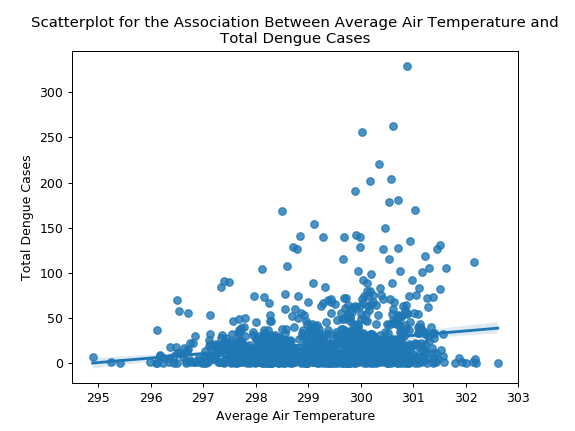

AxesSubplot(0.125,0.11;0.775x0.77)


In [19]:
%matplotlib notebook
scat1 = sns.regplot(x="reanalysis_avg_temp_k", y="total_cases", data=Dengue_clean)
plt.xlabel('Average Air Temperature')
plt.ylabel('Total Dengue Cases')
plt.title('Scatterplot for the Association Between Average Air Temperature and' +  '\n' + 'Total Dengue Cases')
print (scat1)

# standardized residual plots

<IPython.core.display.Javascript object>


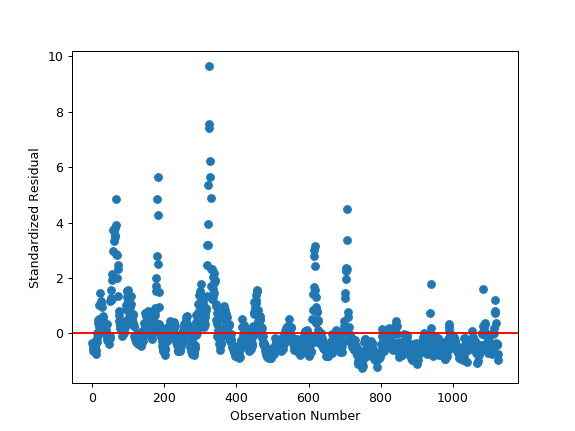

Text(0.5, 0, 'Observation Number')

In [23]:
stdres=pd.DataFrame(reg1.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')